In [6]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path='/content/drive/MyDrive/Malignant Comments Classifier Project/train.csv'
data=pd.read_csv(path)

In [8]:
data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
#categories = list(df.columns.values)

In [12]:
#df=data.head(200)

In [13]:
import sys
sys.setrecursionlimit(10**6)

In [14]:
## Importing more important libraries
from nltk.corpus import wordnet
import string
import nltk
import ast
import re
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.corpus import sentiwordnet
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
def clean_text(text):
    text=str(text)
    text = text.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    rem_num = re.sub('[0-9]+', '', text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)
data["comment_text"] = data["comment_text"].apply(lambda x: clean_text(x))

In [16]:
categories = list(data.columns.values)
categories = categories[2:]
print(categories)

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']


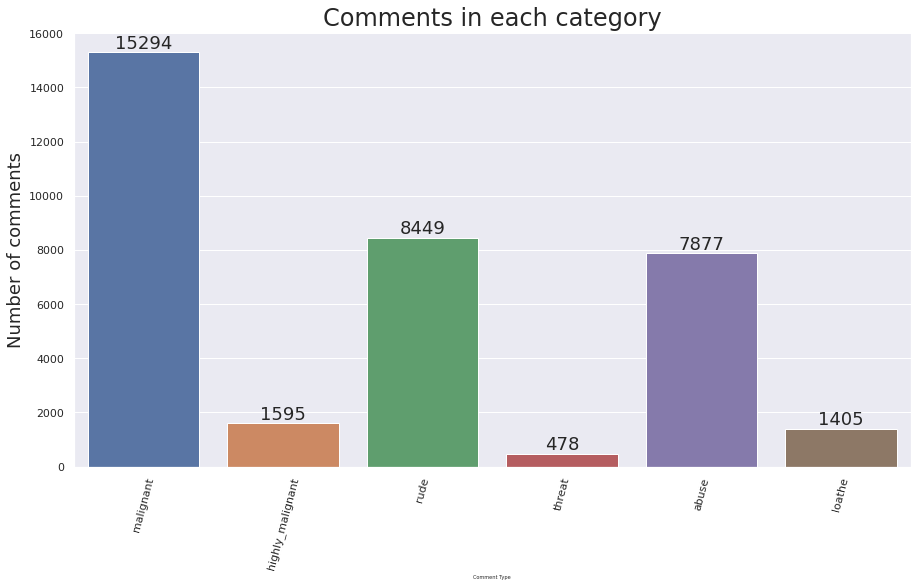

In [17]:
sns.set(font_scale = 1)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, data.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=5)
plt.xticks(rotation=75)
#adding the text labels
rects = ax.patches
labels = data.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

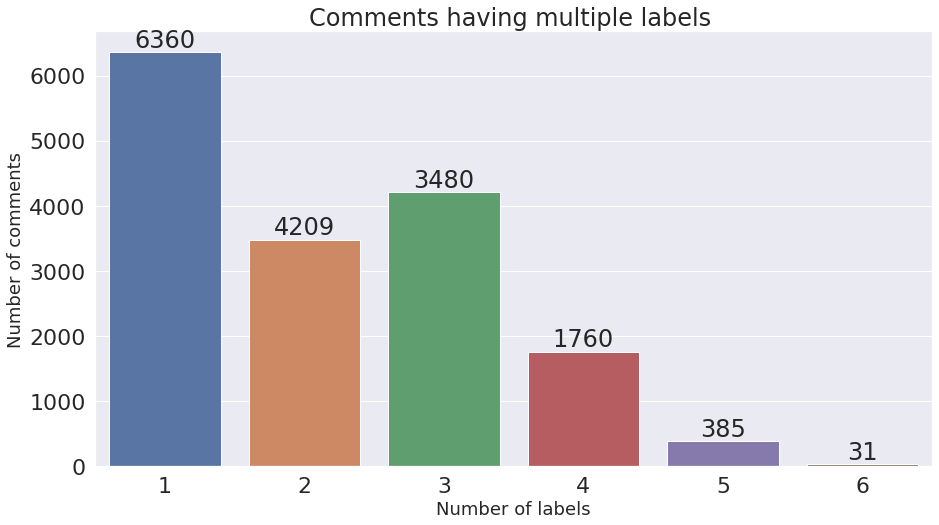

In [18]:
rowSums = data.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [19]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

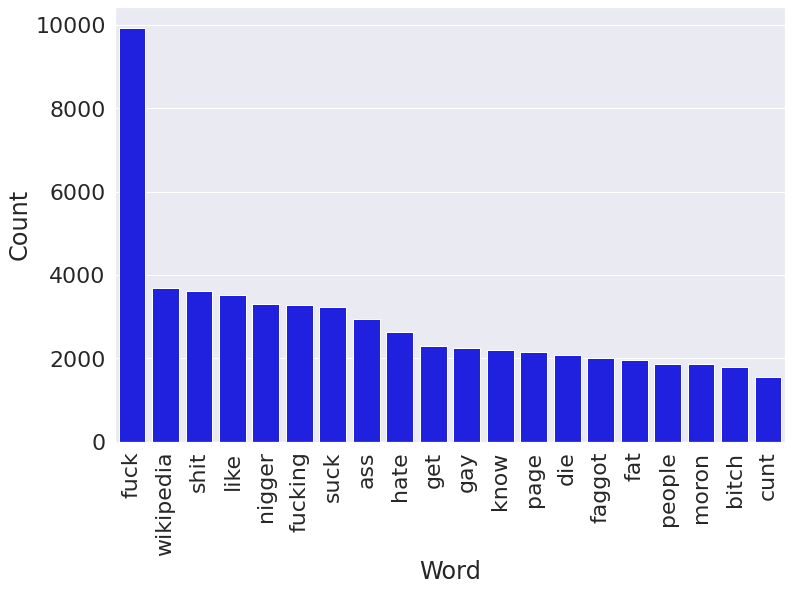

In [20]:
counter(data[data["malignant"] == 1], "comment_text", 20)

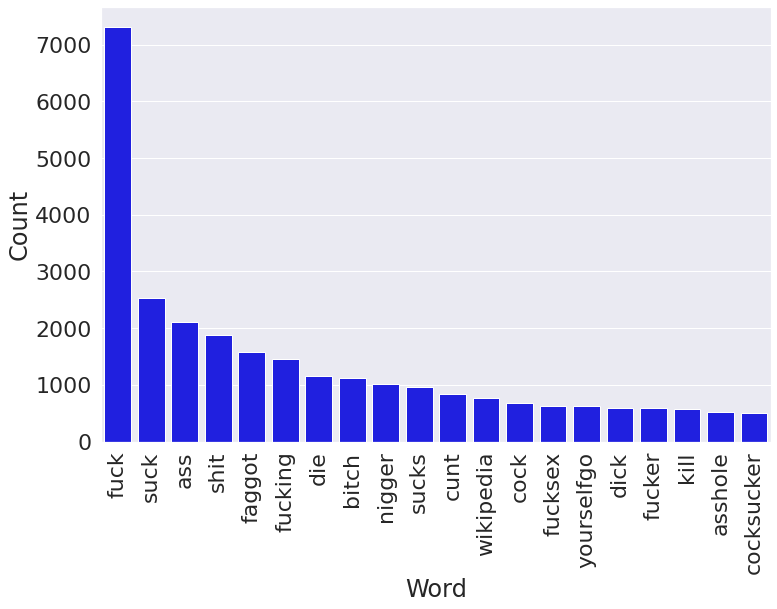

In [21]:
counter(data[data["highly_malignant"] == 1], "comment_text", 20)

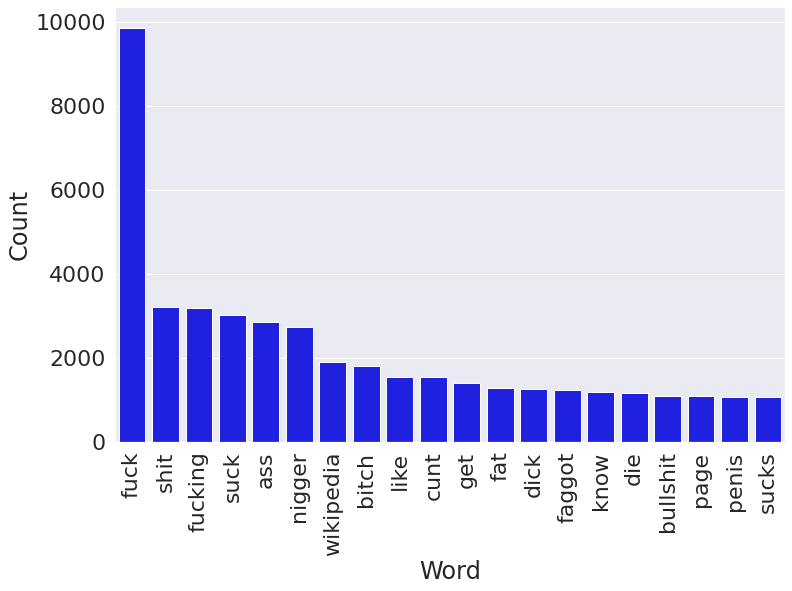

In [22]:
counter(data[data["rude"] == 1], "comment_text", 20)

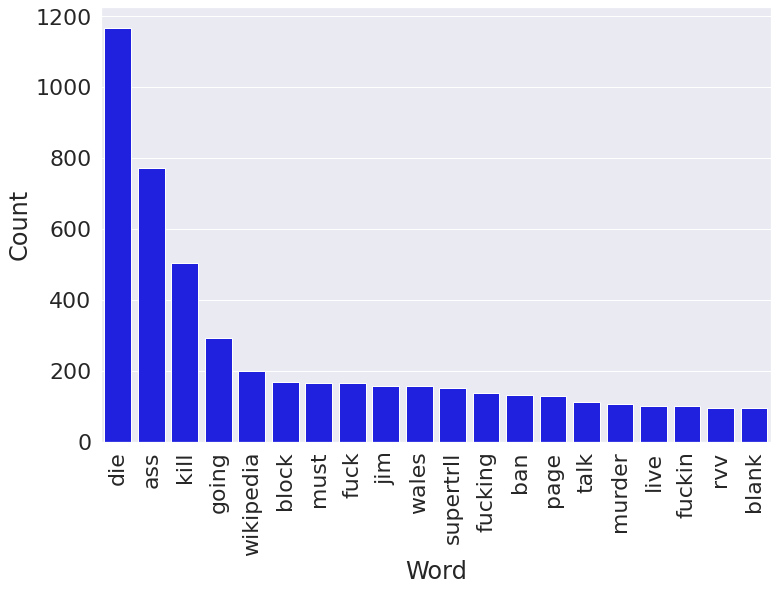

In [23]:
counter(data[data["threat"] == 1], "comment_text", 20)

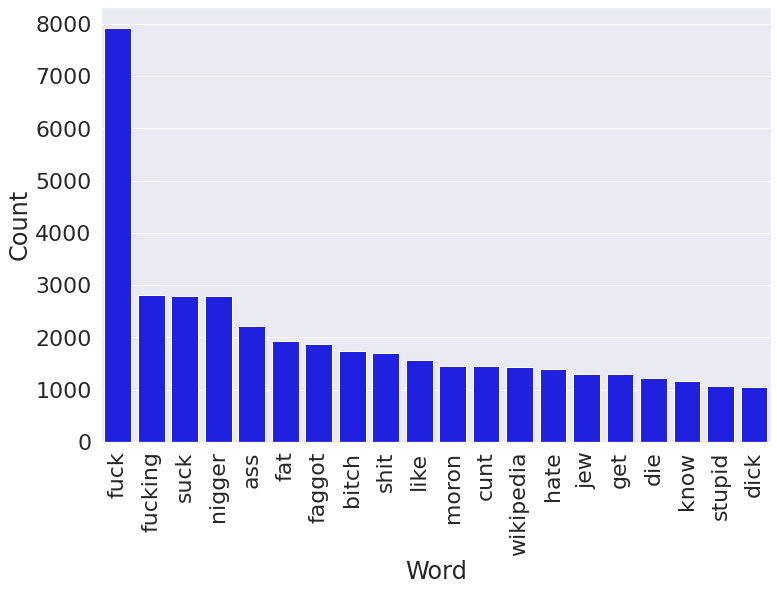

In [24]:
counter(data[data["abuse"] == 1], "comment_text", 20)

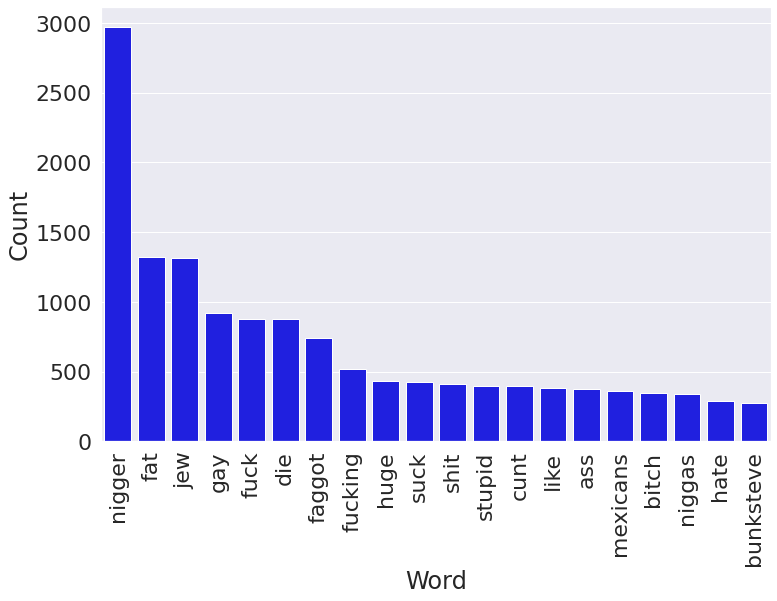

In [25]:
counter(data[data["loathe"] == 1], "comment_text", 20)

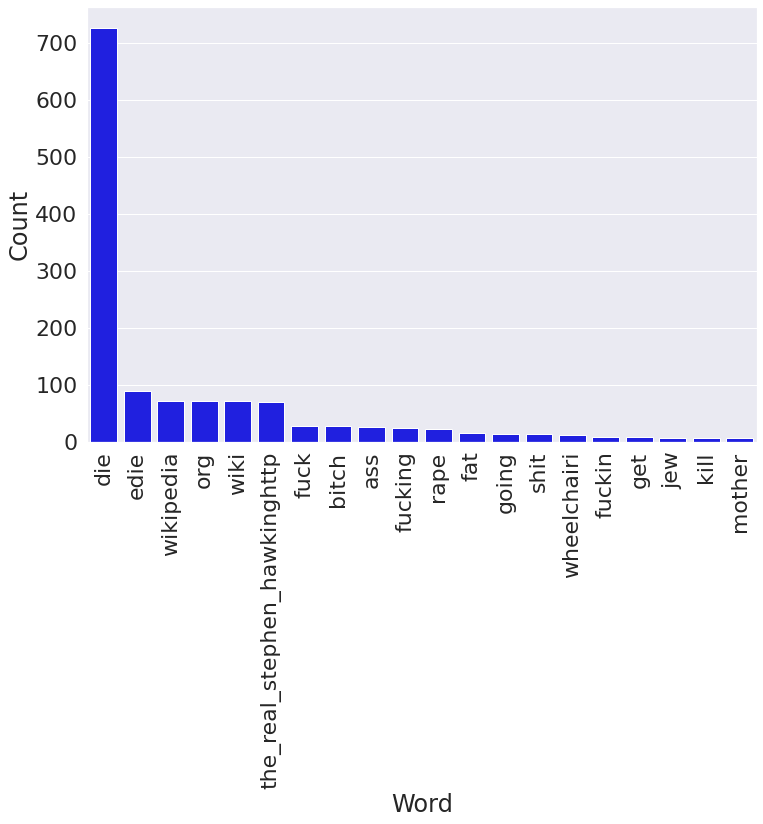

In [26]:
counter(data[(data["malignant"] == 1) & (data["highly_malignant"] == 1) & (data["rude"] == 1) & (data["threat"] == 1) & (data["abuse"] == 1) & (data["loathe"] == 1)], "comment_text", 20)

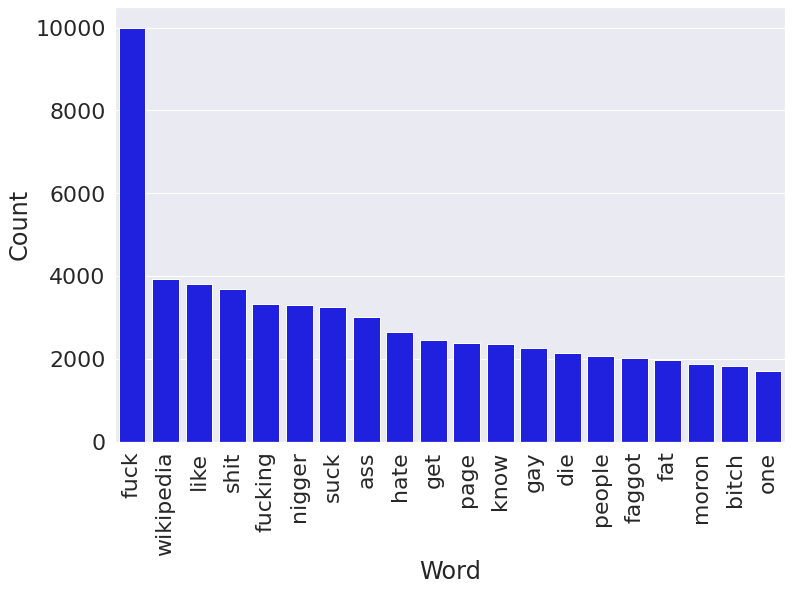

In [27]:
counter(data[(data["malignant"] == 1) | (data["highly_malignant"] == 1) | (data["rude"] == 1) | (data["threat"] == 1) | (data["abuse"] == 1) | (data["loathe"] == 1)], "comment_text", 20)

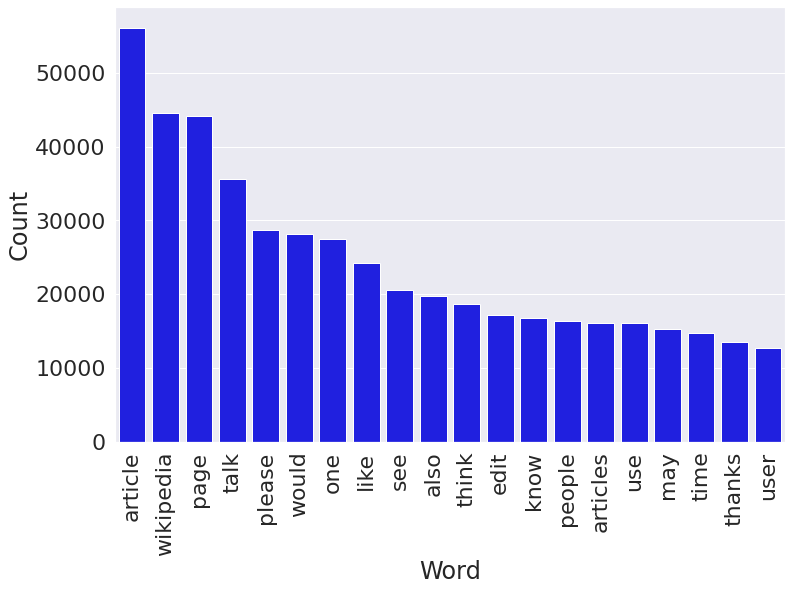

In [28]:
counter(data[(data["malignant"] == 0) & (data["highly_malignant"] == 0) & (data["rude"] == 0) & (data["threat"] == 0) & (data["abuse"] == 0) & (data["loathe"] == 0)], "comment_text", 20)

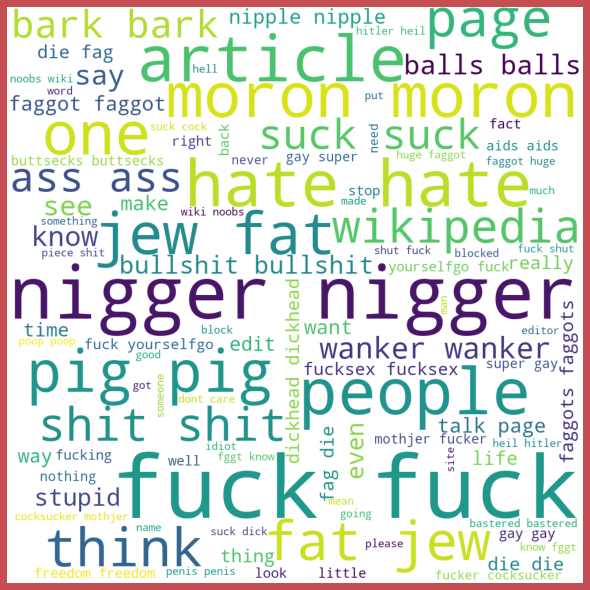

In [29]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["malignant"] == 1)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

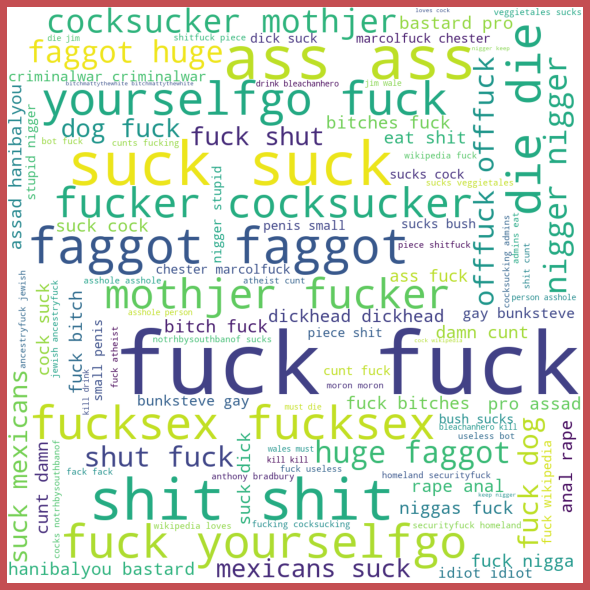

In [30]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["highly_malignant"] == 1)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

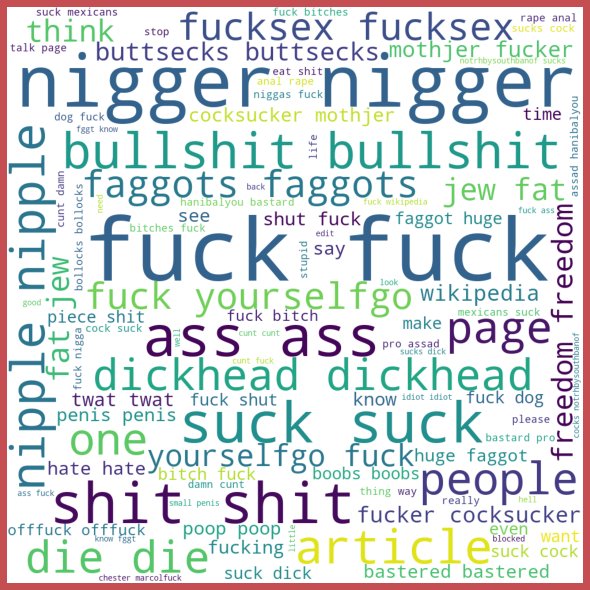

In [31]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["rude"] == 1)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

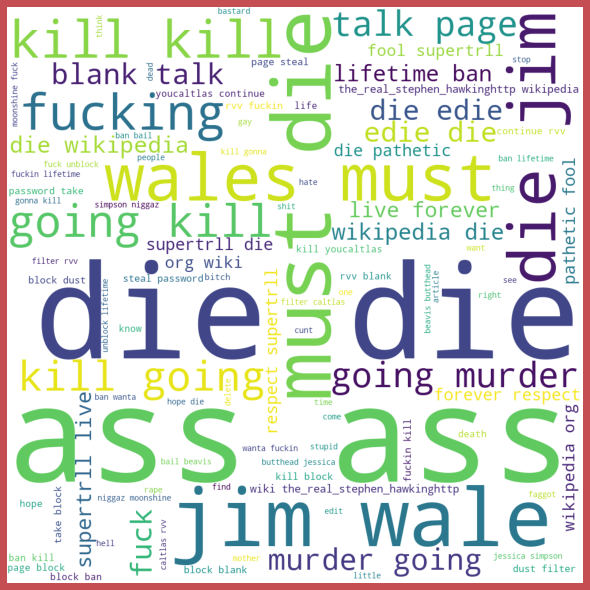

In [32]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["threat"] == 1)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

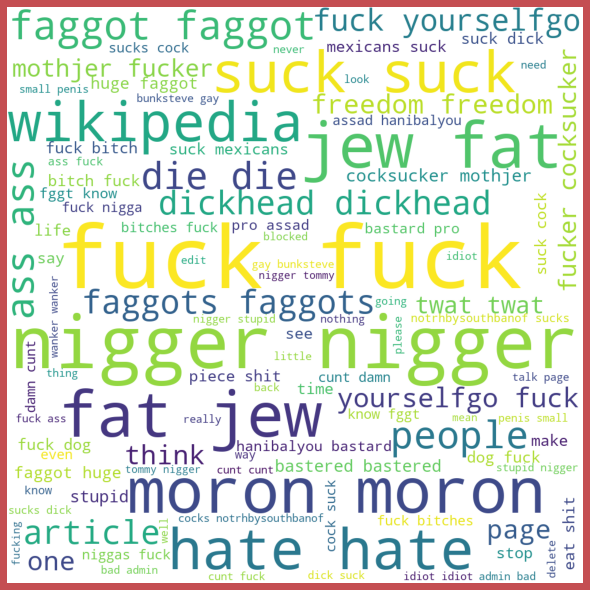

In [33]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["abuse"] == 1)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

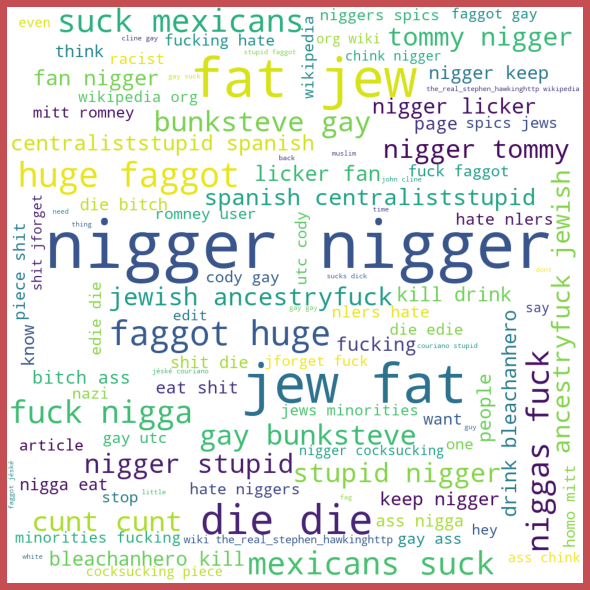

In [34]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["loathe"] == 1)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

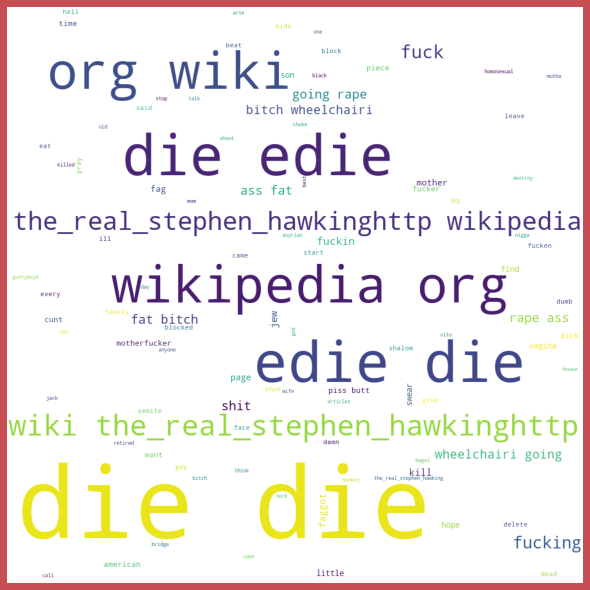

In [35]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["malignant"] == 1) & (data["highly_malignant"] == 1) & (data["rude"] == 1) & (data["threat"] == 1) & (data["abuse"] == 1) & (data["loathe"] == 1)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

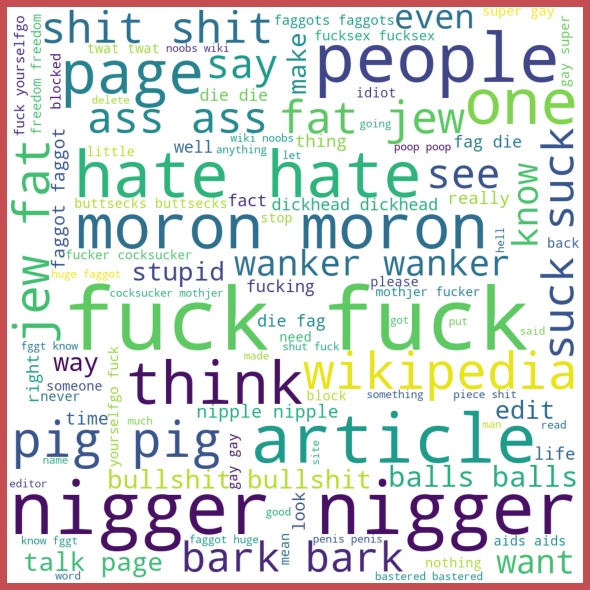

In [36]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["malignant"] == 1) | (data["highly_malignant"] == 1) | (data["rude"] == 1) | (data["threat"] == 1) | (data["abuse"] == 1) | (data["loathe"] == 1)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

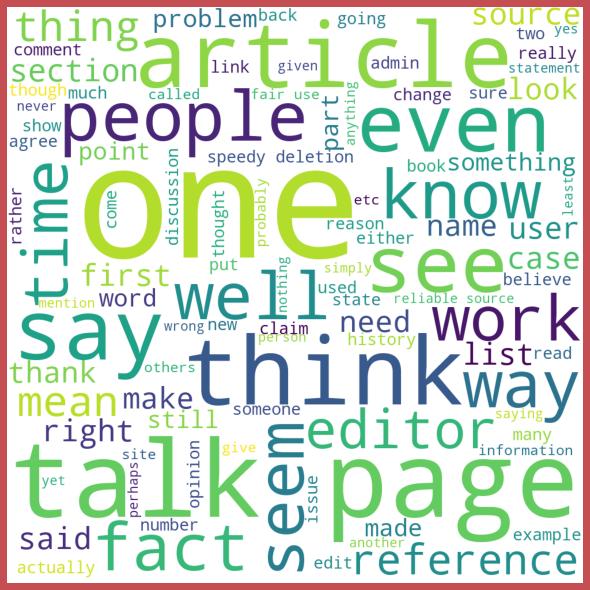

In [37]:
from wordcloud import WordCloud


fake = data["comment_text"][(data["malignant"] == 0) & (data["highly_malignant"] == 0) & (data["rude"] == 0) & (data["threat"] == 0) & (data["abuse"] == 0) & (data["loathe"] == 0)]

fake_cloud = WordCloud(width=1000,height=1000,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(20,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()